<a href="https://colab.research.google.com/github/Estefanoooo/Quimica_practicas/blob/main/PC_CINETICA/Cin%C3%A9tica_qu%C3%ADmica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Determinar la energía de activación para la reacción de isomerización (estudio cinético) e indicar si la reacción es endotérmica o exotérmica (estudio termodinámico):**

## **F\C=C/C (cis)  --> F/C=C/C (trans)**

In [1]:
! pip install rdkit
! pip install pyscf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 38.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 MB 10.2 MB/s eta 0:00:00


In [5]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.drawOptions.addAtomIndices = True

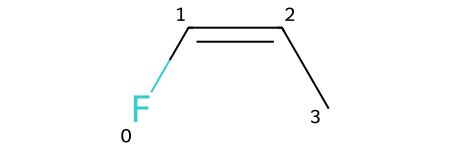

In [6]:
cis ="F\C=C/C"
mol1 = Chem.MolFromSmiles(cis)
mol1

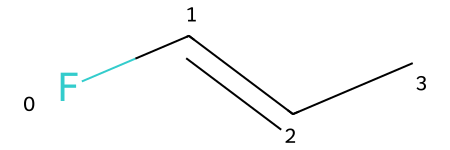

In [7]:
trans = "F/C=C/C"
mol2 = Chem.MolFromSmiles(trans)
mol2



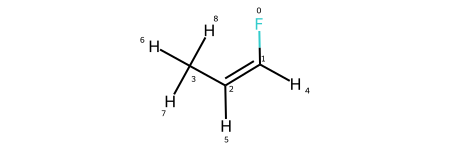

In [8]:
mol1_h=Chem.AddHs(mol1)
mol1_h

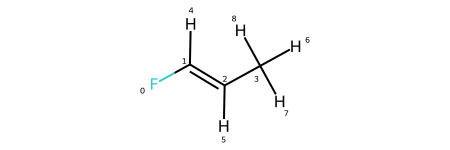

In [9]:
mol2_h=Chem.AddHs(mol2)
mol2_h

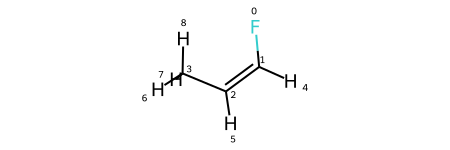

In [10]:
mol = Chem.MolFromSmiles(cis)
mol = Chem.AddHs(mol)
Chem.AllChem.EmbedMolecule(mol)
Chem.MolToXYZFile(mol, "cis.xyz")
mol

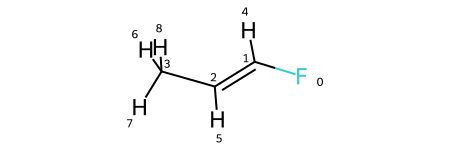

In [11]:

mol2 = Chem.MolFromSmiles(trans)
mol2 = Chem.AddHs(mol2)
Chem.AllChem.EmbedMolecule(mol2)
Chem.MolToXYZFile(mol2, "trans.xyz")
mol2


In [12]:
from pyscf import gto, scf

In [13]:
mol = gto.M(atom="cis.xyz")

In [14]:
mol.basis = "3-21G"

# set the functional
mf = mol.KS()
mf.xc = 'b3lyp'

/usr/local/lib/python3.10/dist-packages/pyscf/dft/libxc.py:771: UserWarning: Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, corresponding to the original definition by Stephens et al. (issue 1480) and the same as the B3LYP functional in Gaussian. To restore the VWN5 definition, you can put the setting "B3LYP_WITH_VWN5 = True" in pyscf_conf.py
  warnings.warn('Since PySCF-2.3, B3LYP (and B3P86) are changed to the VWN-RPA variant, '


In [15]:
mf.kernel()

converged SCF energy = -214.251651928337


-214.25165192833742

In [19]:
Energy_cis=-214.25165192833742

In [16]:
mol8 = gto.M(atom="trans.xyz")

In [17]:
mol8.basis = "3-21G"

# set the functional
mp = mol8.KS()
mp.xc = 'b3lyp'

In [18]:
mp.kernel()

converged SCF energy = -214.251852671681


-214.25185267168143

In [20]:
Energy_trans=-214.25185267168143

In [21]:
pip install git+https://github.com/giacomomarchioro/PyEnergyDiagrams


  Cloning https://github.com/giacomomarchioro/PyEnergyDiagrams to /tmp/pip-req-build-mk0o6et7
  Running command git clone --filter=blob:none --quiet https://github.com/giacomomarchioro/PyEnergyDiagrams /tmp/pip-req-build-mk0o6et7
  Resolved https://github.com/giacomomarchioro/PyEnergyDiagrams to commit 3d6086564aa99aa0a0f3db4a510b736015562d5c
  Preparing metadata (setup.py) ... done
  Created wheel for energydiagram: filename=energydiagram-0.2.0-py3-none-any.whl size=9466 sha256=788cf5a9d1bcb07748487b2e3107975ae402b615299792b842f269563e1cc3d9
  Stored in directory: /tmp/pip-ephem-wheel-cache-c4q5h_0z/wheels/fd/36/8c/10ed87cd41f9638b1e3a44dabe7e1e185131d967ea6ed395cf
Successfully built energydiagram


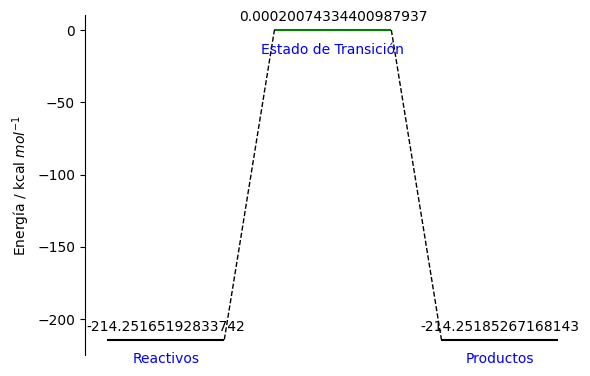

In [22]:
import matplotlib.pyplot as plt
from energydiagram import ED

energia_reactivos = Energy_cis
energia_productos = Energy_trans


energia_activacion = energia_reactivos - energia_productos


diagram = ED()


diagram.add_level(energia_reactivos, 'Reactivos')
diagram.add_level(energia_activacion, 'Estado de Transición', color='g')
diagram.add_level(energia_productos, 'Productos')


diagram.add_link(0, 1)
diagram.add_link(1, 2)


diagram.plot(ylabel="Energía / kcal $mol^{-1}$")
plt.show()

In [24]:
#Saber si la reacción es exotermica o endotermica
Energia=Energy_trans - Energy_cis
if Energia<0:
  print("La reacción es exotérmica")
else:
  print("La reacción es endotérmica")

La reacción es exotérmica
